# Machine Learning on PGA Tour - Exploratory Data Analysis

In this notebook we will try to get an overview of the data using visualization and statistical methods before we proceed to the machine learning models.

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("../data/pga_data.csv")
df

,Name,Season,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Spin Rate,Eligible
0,Rory McIlroy,2016,1,304.9,61.80,119.62,179.01,2435.6,1.0
1,Dustin Johnson,2016,2,313.9,56.85,122.38,181.75,2685.6,1.0
2,Patrick Reed,2016,3,296.7,56.68,118.37,172.95,2936.1,1.0
3,Adam Scott,2016,4,303.9,55.71,119.05,179.21,2507.4,1.0
4,Paul Casey,2016,5,294.0,64.41,117.46,173.41,2473.3,1.0
...,...,...,...,...,...,...,...,...,...
734,C.T. Pan,2021,121,296.3,61.03,111.20,167.34,2129.2,-1.0
735,Matt Kuchar,2021,122,288.0,65.81,108.60,162.18,2419.4,-1.0
736,Brice Garnett,2021,123,288.1,70.86,109.53,164.71,2539.5,-1.0
737,Scott Stallings,2021,124,298.2,58.83,115.96,173.80,2516.0,-1.0


Kernel Density Estimations:

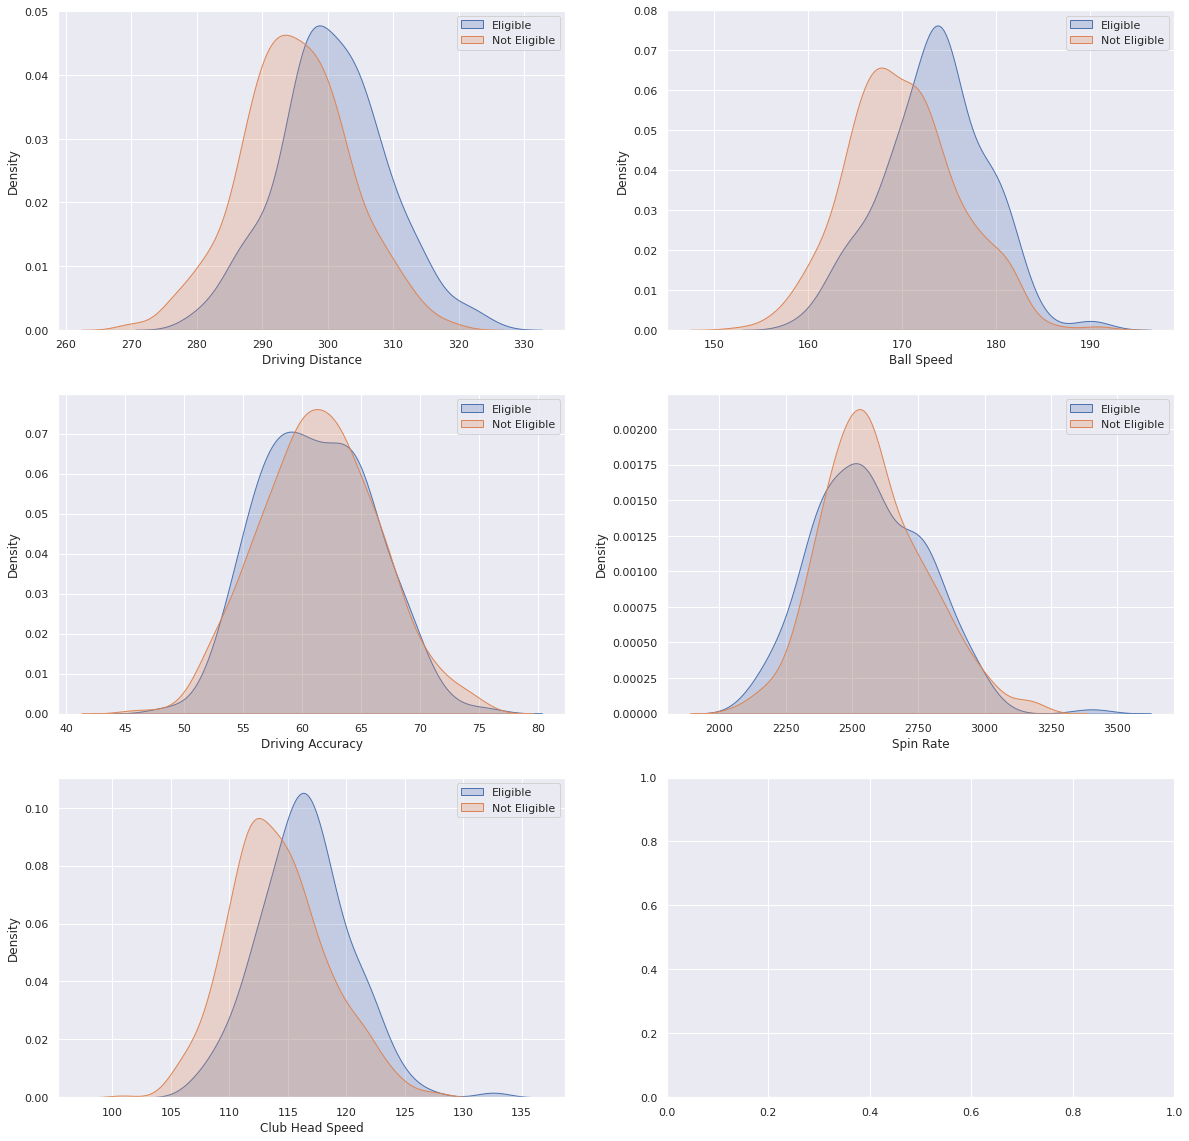

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
i = 0
j = 0
for label in ["Driving Distance", "Driving Accuracy", "Club Head Speed", "Ball Speed", "Spin Rate"]:
    sns.kdeplot(df[df["Eligible"] == 1][label], ax=axes[i, j], shade=True, label="Eligible")
    sns.kdeplot(df[df["Eligible"] == -1][label], ax=axes[i, j], shade=True, label="Not Eligible")
    axes[i, j].legend()
    if i == 2:
        j += 1
        i = 0
    else:
        i += 1

Linear Dependencies of the Features:

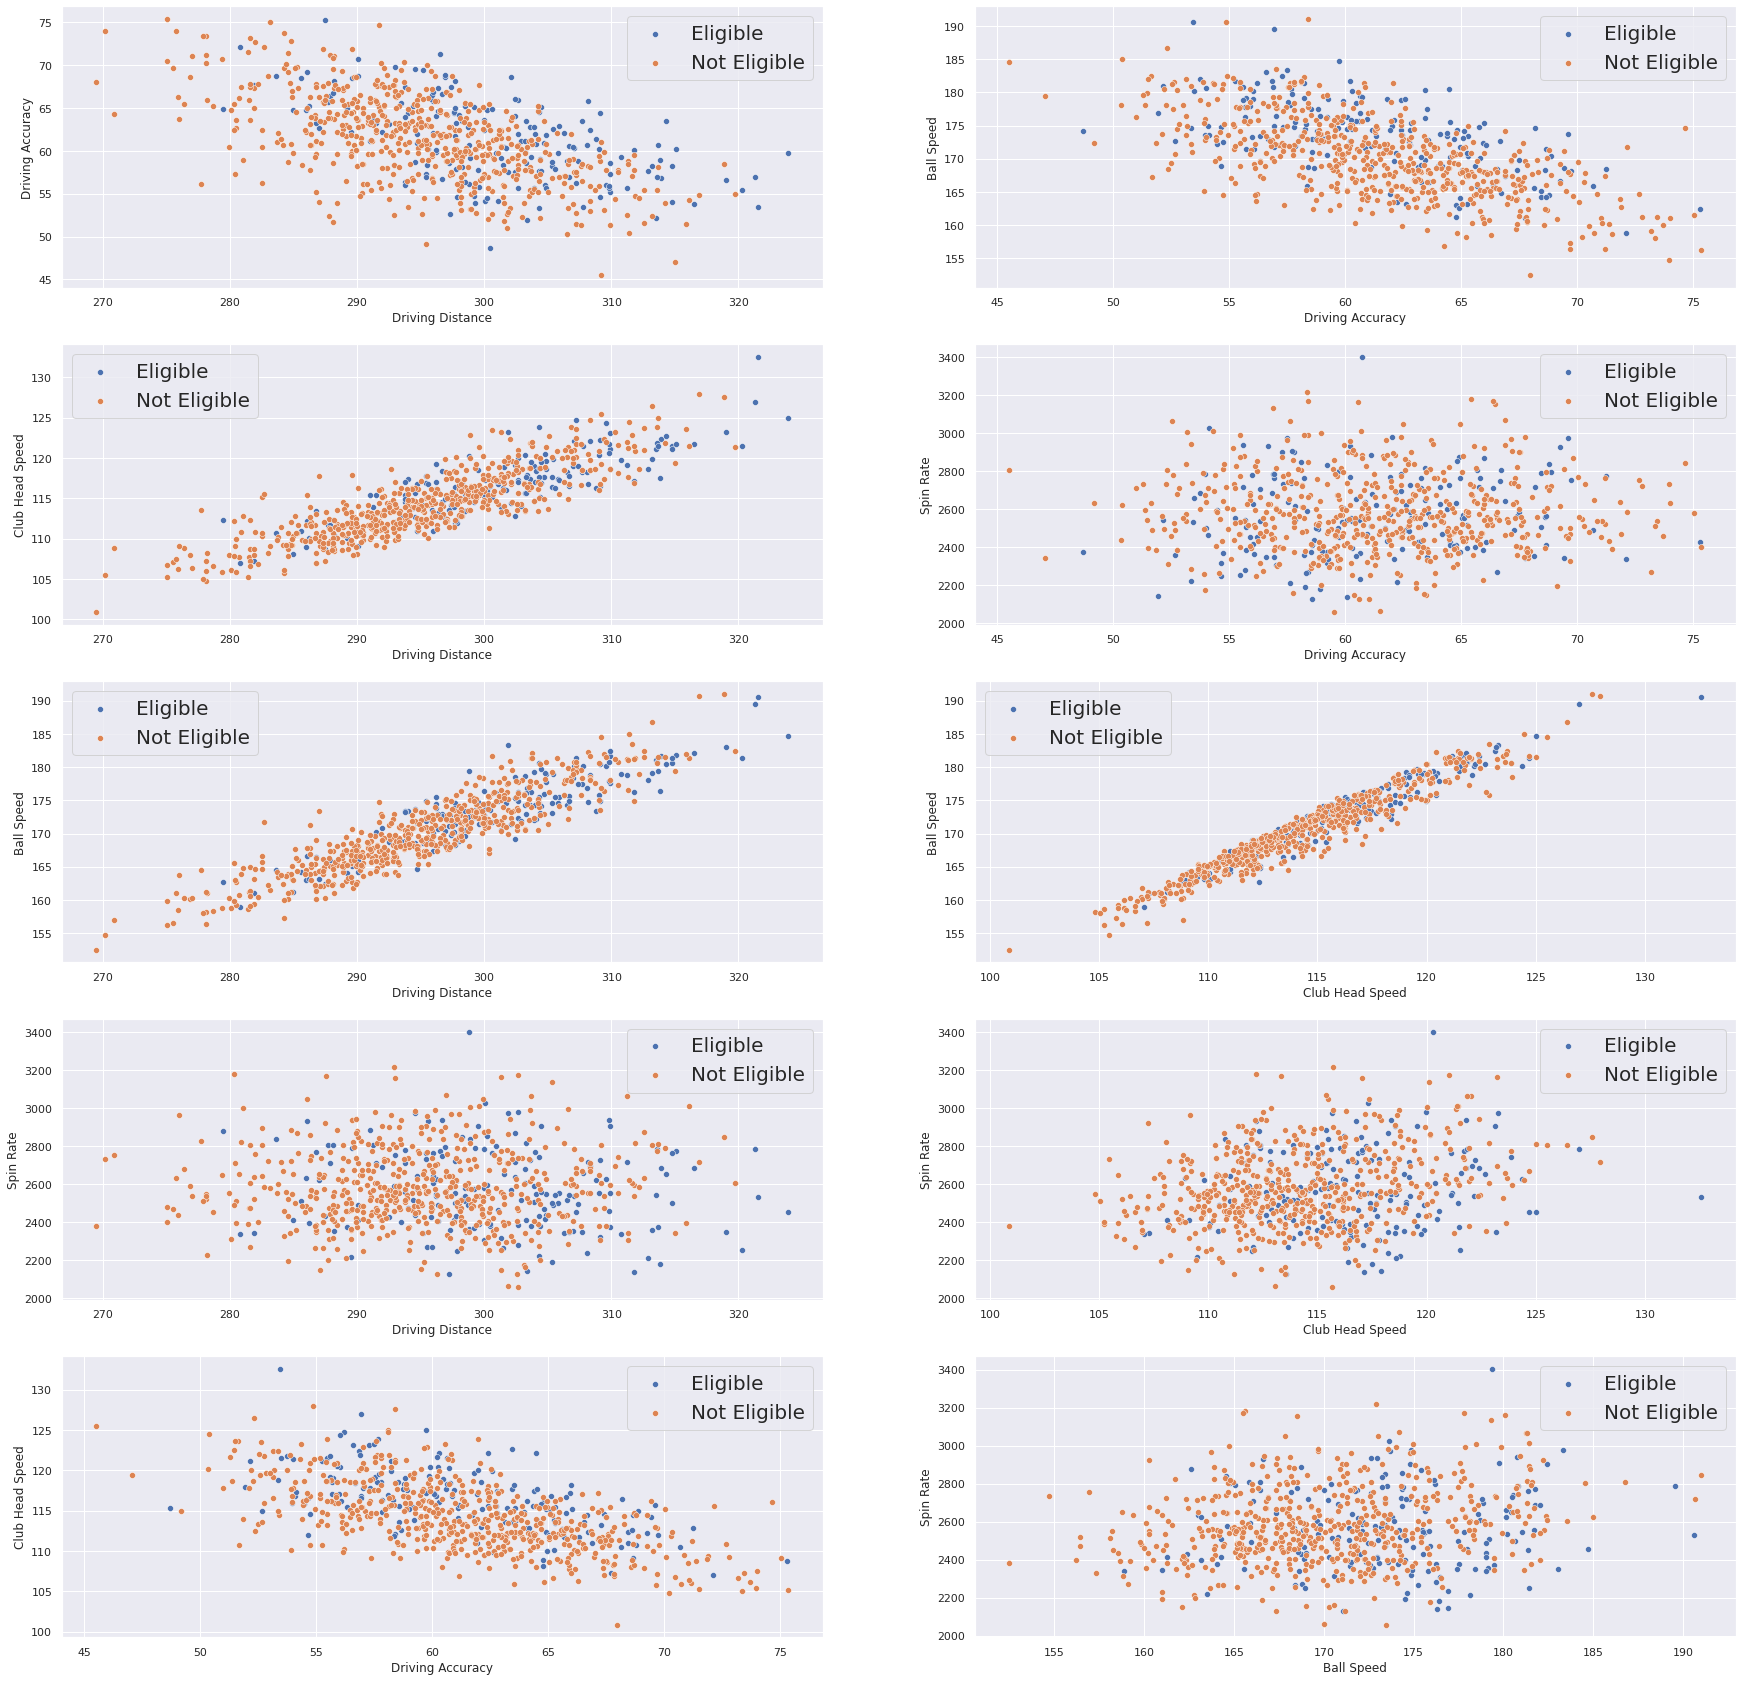

In [4]:
import itertools

columns = df.columns[3:8]
i = 0
j = 0

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
plt.rcParams['axes.labelsize'] = 14

for pair in itertools.combinations(columns, 2):
    sns.scatterplot(x=df[df["Eligible"] == 1][pair[0]], y=df[df["Eligible"] == 1][pair[1]], ax=axes[i, j], label="Eligible")
    sns.scatterplot(x=df[df["Eligible"] == -1][pair[0]], y=df[df["Eligible"] == -1][pair[1]], ax=axes[i, j], label="Not Eligible")
    axes[i, j].legend(prop={'size': 20})
    if i == 4:
        j += 1
        i = 0
    else:
        i += 1

There seems to be a lot of multicollinearity between some of the features (e.g., Club Head Speed and Ball Speed). We will take care of this issue in the next notebook that covers data preprocessing.